In [5]:
# Project PyAutomata Recognition Notebook
"""
This notebook exists for visualizing repeating pattern data on cellular automata
"""
# Third-Party Modules
import matplotlib.pyplot as plt

# Local Modules
from pyautomata import Canvas, Recognizer, Pattern
from pyautomata.render import prepare_plot

# Global Variables
pattern = Pattern.STANDARD
pattern_length = 10

# Functions
add_plot = lambda x, y, label: plt.plot(x, y, marker='o', linestyle='-', label=label)
show_result_plot = lambda legend: prepare_plot('Rows', 'Patterns', f'Max Patterns for Pattern Length: {pattern_length}', legend=legend)

In [6]:
# Max Pattern Calculation
"""
This calculates the max amount of patterns within all rules.
Uses the standard pattern by default.
"""
all_rules: dict[int, dict[int, int]] = {}

for rule in range(1, 257):
    print(f'Calculating Rule: {rule}', end='\r')

    local_rule = {}
    max_pattern_count = 0

    for rows in range(pattern_length ** (3//2), pattern_length * 250, pattern_length ** (3//2)):
        canvas = Canvas(rule, rows, pattern)
        recognizer = Recognizer(rule, canvas.result, pattern_length)
        pattern_count = len(recognizer.pattern_rules)

        if max_pattern_count == pattern_count:
            break
        
        if max_pattern_count > pattern_count:
            break

        local_rule[rows] = pattern_count
        max_pattern_count = pattern_count

    all_rules[rule] = local_rule

print('All calculations completed.')

All calculations completed.


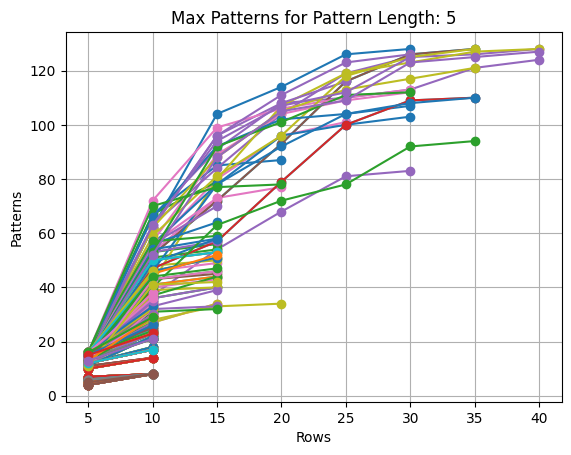

In [7]:
# Plot Results
"""
Plots all the rules on a chart showing the variance in max patterning.
No labeling because it crowds out the plot badly, this just shows overall
  trending and how early some finish versus others high max patterns, etc.
"""
for rule, output_dict in all_rules.items():
    add_plot(output_dict.keys(), output_dict.values(), rule)
show_result_plot(legend=False)

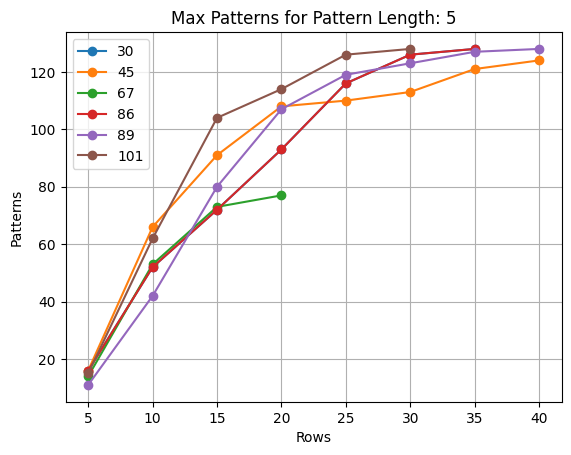

In [8]:
# Plot Selected Results
"""
Plots only the rules selected in the list with labeling.
The pre-selected list shows some more interesting cases.
"""
rules_wanted: list[int] = [30, 45, 67, 86, 89, 101]

for rule in rules_wanted:
    output_dict = all_rules.get(rule)
    add_plot(output_dict.keys(), output_dict.values(), rule)
show_result_plot(legend=True)